# Machine learning python practical assignment

This Machine Learning assignment focuses on applying and evaluating classification algorithms using the Diabetes dataset, which comprises medical records to predict the likelihood of diabetes in individuals. The dataset includes features such as glucose levels, blood pressure, BMI, and age, and the target variable indicates whether a person is diabetic (1) or not (0).

# Importing the required libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, roc_curve, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="color:blue">Loading and exploring the dataset</h2>

In [6]:
# Load the dataset
df = pd.read_csv("C:\\Users\\n\\Downloads\Machine learning python practical assignment_1\\diabetes.csv")

In [7]:
# Display the first 5 rows from the dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Display the shape of the dataset
df.shape

(768, 9)

In [9]:
# Display the columns in the dataset
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Display some basic infromation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Display some statistical infromation about the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<h2 style="color:blue">Data Preprocessing</h2>

In [12]:
# Check null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# Check duplication values
df.duplicated().sum()

0

<h2 style="color:blue">Features and Target extraction</h2>

In [14]:
# Extract the features
X = df.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [15]:
# Extract the target (label)
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

<h2 style="color:blue">Spliting the data</h2>

In [16]:
# Split the data into 2/3 training and 1/3 testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
# showing the shape of x-train and x-test
X_train.shape , X_test.shape

((514, 8), (254, 8))

In [18]:
# showing the shape of y-train and y-test
y_train.shape , y_test.shape

((514,), (254,))

<h2 style="color:blue">Scaling the data</h2>

In [19]:
# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<h2 style="color:blue">Modeling</h2>

<h4 style="color:red">Modeling using Logistic Regression</h4>

In [20]:
# Initialize the model
log_reg_model = LogisticRegression()

In [21]:
# Train the model
log_reg_model.fit(X_train_scaled, y_train)

LogisticRegression()

<h4 style="color:red">Modeling using Linear SVM </h4>

In [22]:
# Initialize the model
svm_linear_model = SVC(kernel='linear', probability=True)

In [23]:
# Train the model
svm_linear_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', probability=True)

<h4 style="color:red">Modeling using RBF SVM </h4>

In [24]:
# Initialize the model
svm_rbf_model = SVC(kernel='rbf', probability=True)

In [25]:
# Train the model
svm_rbf_model.fit(X_train_scaled, y_train)

SVC(probability=True)

<h2 style="color:blue">Predicting the Models</h2>

<h4 style="color:red">Predicting the Logistic Regression</h4>

In [26]:
# Step 5: Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test_scaled)
y_pred_log_reg[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

<h4 style="color:red">Predicting the Linear SVM </h4>

In [27]:
# Step 5: Make predictions on the test set
y_pred_svm_linear = svm_linear_model.predict(X_test_scaled)
y_pred_svm_linear[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

<h4 style="color:red">Predicting the RBF SVM</h4>

In [28]:
# Step 5: Make predictions on the test set
y_pred_svm_rbf = svm_rbf_model.predict(X_test_scaled)
y_pred_svm_rbf[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

<h2 style="color:blue">Evaluating the Models</h2>

<h4 style="color:red">Evaluating the Logistic Regression</h4>

In [29]:
# Finding the accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_log_reg

0.7401574803149606

In [30]:
# Finding the AUC
auc_log_reg = roc_auc_score(y_test, y_pred_log_reg)
auc_log_reg

0.7070874861572536

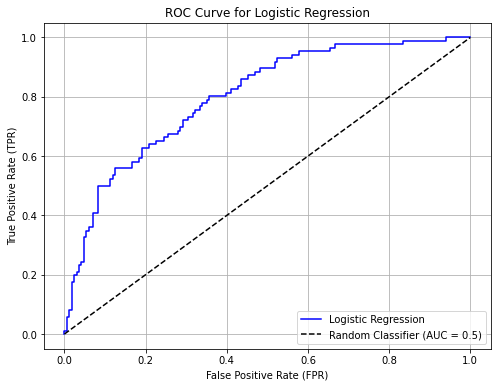

In [31]:
# Ploting Areas Under the ROC Curves (AUCs)
y_prob_log_reg = log_reg_model.predict_proba(X_test_scaled)[:, 1] 
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [32]:
# Finding f1 score value
f1_log_reg = f1_score(y_test, y_pred_log_reg)
f1_log_reg

0.611764705882353

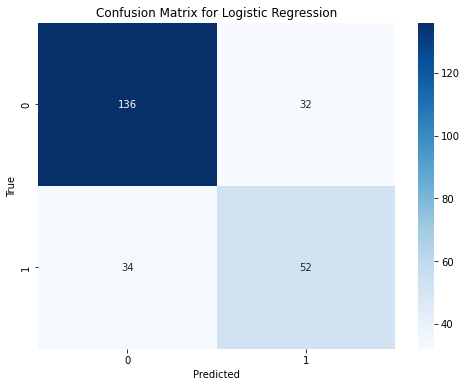

In [33]:

cm = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [35]:
cm 

array([[136,  32],
       [ 34,  52]], dtype=int64)

<h4 style="color:red">Evaluating the Linear SVM</h4>

In [36]:
# Finding the accuracy
accuracy_svm_linear = accuracy_score(y_test, y_pred_svm_linear)
accuracy_svm_linear

0.7519685039370079

In [37]:
# Finding the AUC
auc_svm_linear = roc_auc_score(y_test, y_pred_svm_linear)
auc_svm_linear

0.7188538205980066

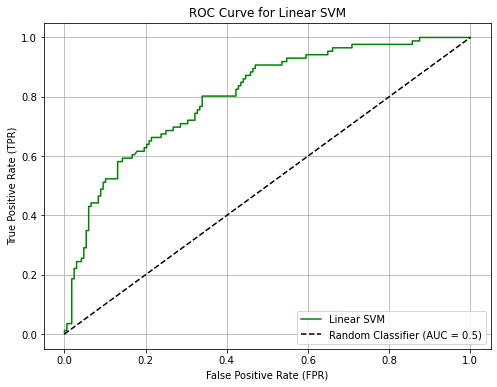

In [38]:
# Ploting Areas Under the ROC Curves (AUCs)
y_prob_svm_linear = svm_linear_model.predict_proba(X_test_scaled)[:, 1] 
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, y_prob_svm_linear)

# Plot ROC curve for Linear SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_linear, tpr_svm_linear, color='green', label=f'Linear SVM')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Linear SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [39]:
# Finding f1 score value
f1_svm_linear = f1_score(y_test, y_pred_svm_linear)
f1_svm_linear

0.6272189349112426

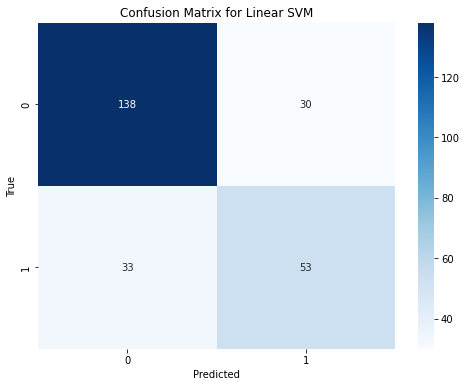

In [40]:
cm = confusion_matrix(y_test, y_pred_svm_linear)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Linear SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [42]:
cm 

array([[138,  30],
       [ 33,  53]], dtype=int64)

<h4 style="color:red">Evaluating the RBF SVM</h4>

In [43]:
# Finding the accuracy
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)
accuracy_svm_rbf

0.7519685039370079

In [44]:
# Finding the AUC
auc_svm_rbf = roc_auc_score(y_test, y_pred_svm_rbf)
auc_svm_rbf

0.7075027685492802

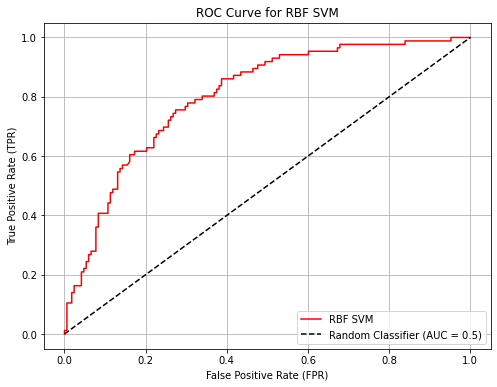

In [45]:
# Ploting Areas Under the ROC Curves (AUCs)
y_prob_svm_rbf = svm_rbf_model.predict_proba(X_test_scaled)[:, 1] 
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, y_prob_svm_rbf)

# Plot ROC curve for RBF SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm_rbf, tpr_svm_rbf, color='red', label=f'RBF SVM')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for RBF SVM')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [46]:
# Finding f1 score value
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf)
f1_svm_rbf

0.608695652173913

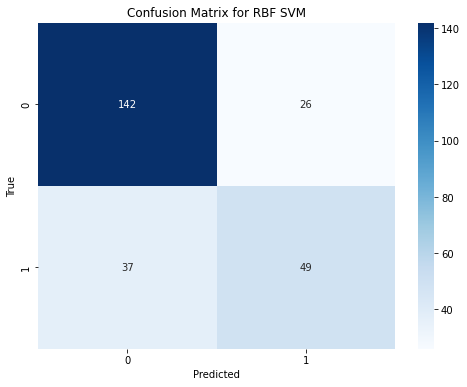

In [47]:
cm = confusion_matrix(y_test, y_pred_svm_rbf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [48]:
cm

array([[142,  26],
       [ 37,  49]], dtype=int64)

<h2 style="color:blue">Compare the obtained results </h2>

***Compare based on the accuracy***

In [40]:
# Model names and accuracy values
models = ['Logistic Regression', 'Linear SVM', 'RBF SVM']
accuracies = [accuracy_log_reg, accuracy_svm_linear, accuracy_svm_rbf]

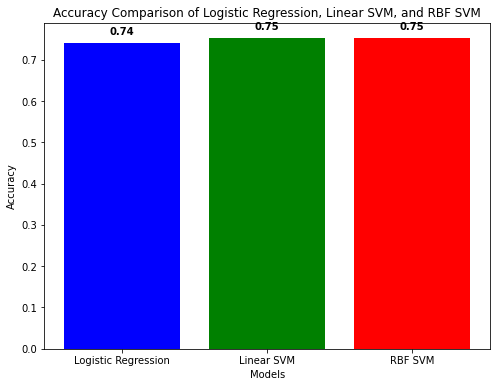

In [41]:
# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Logistic Regression, Linear SVM, and RBF SVM')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

***Based on the above curve that showing the relation between each model and its accuracy, it is found that the SVM with linear and rbf kernels is giving the highest accuracy comparing with the logistic regression model***

---------------------

***Compare based on the F1 Score***

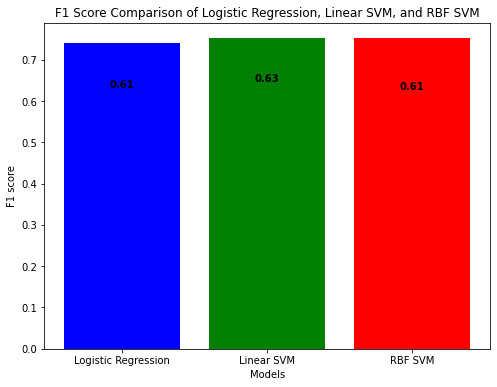

In [42]:
# Model names and accuracy values
models = ['Logistic Regression', 'Linear SVM', 'RBF SVM']
f1_scores = [f1_log_reg, f1_svm_linear, f1_svm_rbf]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('F1 score')
plt.title('F1 Score Comparison of Logistic Regression, Linear SVM, and RBF SVM')
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

***Based on the above curve that showing the relation between each model and its f1 score, it is found that the SVM with linear is giving the highest score that equal 0.63***

------------------------

***Compare based on the AUC***

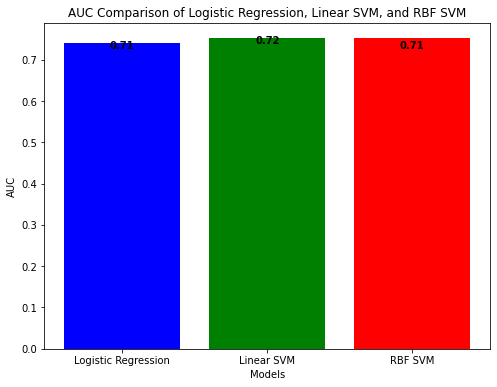

In [43]:
# Model names and accuracy values
models = ['Logistic Regression', 'Linear SVM', 'RBF SVM']
auc_values = [auc_log_reg, auc_svm_linear, auc_svm_rbf]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('AUC')
plt.title('AUC Comparison of Logistic Regression, Linear SVM, and RBF SVM')
for i, v in enumerate(auc_values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()

***Based on the above curve that showing the relation between each model and its AUC value, it is found that the SVM with linear is giving the highest value that equal 0.72***

---------------------

***Results of the three models***

In [44]:
import pandas as pd

models = ['Logistic Regression', 'Linear SVM', 'RBF SVM']
accuracies = [accuracy_log_reg, accuracy_svm_linear, accuracy_svm_rbf]
auc_values = [auc_log_reg, auc_svm_linear, auc_svm_rbf]
f1_scores = [f1_log_reg, f1_svm_linear, f1_svm_rbf]

data = {'Model': models,
        'Accuracy': accuracies,
        'AUC': auc_values,
        'F1': f1_scores}

df = pd.DataFrame(data)
df


,Model,Accuracy,AUC,F1
0,Logistic Regression,0.740157,0.707087,0.611765
1,Linear SVM,0.751969,0.718854,0.627219
2,RBF SVM,0.751969,0.707503,0.608696


<h2 style="color:blue">Use the k-fold cross validation</h2>

In [45]:
# Step 8: Cross-validation to compare results
cv_scores_log_reg = cross_val_score(log_reg_model, X_train_scaled, y_train, cv=3, scoring='accuracy')
cv_scores_svm_linear = cross_val_score(svm_linear_model, X_train_scaled, y_train, cv=3, scoring='accuracy')
cv_scores_svm_rbf = cross_val_score(svm_rbf_model, X_train_scaled, y_train, cv=3, scoring='accuracy')


In [46]:
print(f'Logistic Regression CV Accuracy: {cv_scores_log_reg.mean()}')
print(f'Linear SVM CV Accuracy: {cv_scores_svm_linear.mean()}')
print(f'RBF SVM CV Accuracy: {cv_scores_svm_rbf.mean()}')

Logistic Regression CV Accuracy: 0.7703885035586383
Linear SVM CV Accuracy: 0.7742871390362209
RBF SVM CV Accuracy: 0.7586812638832222


----------------------------------

### End